<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B3%D0%BE_%D0%B2%D0%B5%D0%B1_%D1%81%D0%B5%D1%80%D0%B2%D0%B5%D1%80%D0%B0_%D0%B8_%D0%BD%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B0_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%7C_%D0%94%D0%97_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо подготовить нейронную сеть для распознавания MNIST, загрузить на Heroku и запустить веб сервис:

* Подготовить модель для распознавания MNIST
* Подключить Git
* Подключить Heroku
* Загрузить модуль на Heroku и проверить работу веб-сервиса

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
from google.colab import drive

%matplotlib inline

## Распознавание изображений из набора данных MNIST 


**Подготовка данных**


In [ ]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

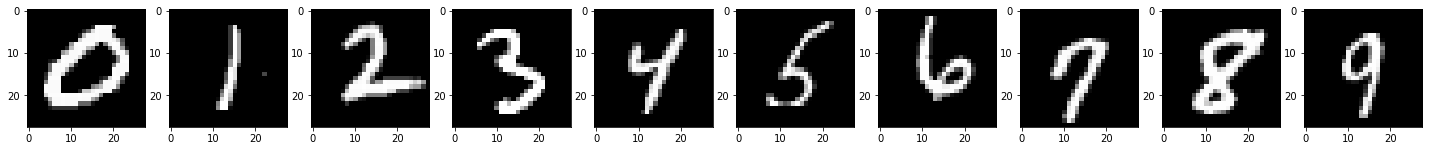

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

Epoch 1/15
469/469 [==============================] - 12s 7ms/step - loss: 0.1560 - accuracy: 0.9526 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0338 - val_accuracy: 0.9889
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0300 - val_accuracy: 0.9903
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9915
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0290 - val_accuracy: 0.9902
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0275 - val_accuracy: 0.9922
Epoch

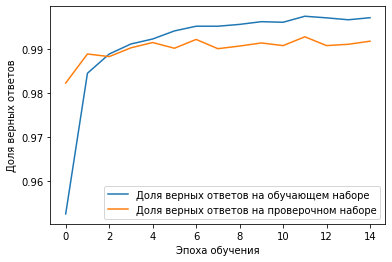

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# Пересохранение обученной модели полностью (веса и архитектура)
model.save('model_fmr_all.h5')

In [ ]:
# Создадим программный файл с кодом для:
# инициализации модели;
# загрузки весов;
# работы модели в режиме распознавания;
# пред- и постобработки изображений.

segment_file = '''

from tensorflow.keras.models import load_model
MODEL_PATH = 'model_fmr_all.h5'
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image 
model = load_model(MODEL_PATH)


def process(image_file):
    digit_image = Image.open(image_file)
    resized_image = digit_image.resize((28, 28))
    img = image.img_to_array(resized_image)
    img = np.array(img[:,:,1])
    img = np.where(img > 170, 255, img)
    img = 255 - img
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    return digit_image, np.argmax(prediction)

'''

with open('segment.py', 'w') as file:
    file.write(segment_file)

In [ ]:
# проверка созданного скрипта
import segment
import matplotlib.pyplot as plt
result = segment.process('digit.png')

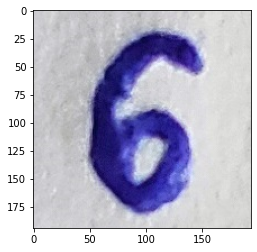

In [ ]:
# Отображаем оригинальное изображение
plt.imshow(result[0])
plt.show()

In [ ]:
# отображаем предсказанное число
print(f'Модель предсказала: {result[1]}')

Модель предсказала: 6


In [ ]:
# Создадим файл приложения (формы)

app_file = '''

import streamlit as st
from PIL import Image 
from segment import process

st.title('Handwritten Digit Prediction')

image_file = st.file_uploader('Load an image', type=['png', 'jpg'])  # Добавление загрузчика файлов

if not image_file is None:                                           # Выполнение блока, если загружено изображение
    image = Image.open(image_file)                                   # Открытие изображения
    results = process(image_file)                                    # Обработка изображения с помощью функции, реализованной в другом файле
    st.text('Source image')
    st.image(results[0])                                           # Вывод исходного изображения
    st.text(f'Модель предсказала: {results[1]}')
'''

with open('app.py', 'w') as file:
    file.write(app_file)

In [ ]:
# Создадим файл конфигурации Streamlit

setup_file = '''

mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

'''

with open('setup.sh', 'w') as file:
    file.write(setup_file)

In [ ]:
# Создадим командный файл для запуска сервиса

proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
    file.write(proc_file)

In [ ]:
# Создадим файл требований необходимых пакетов

requirements_file = '''

streamlit==0.82.0
tensorflow-cpu==2.5.0

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
# Удалим лишние файлы, находящиеся в текущей папке в Colab по умолчанию

!rm -rf sample_data

In [ ]:
# начальная настройка Git
!git config --global user.email "amcloun@rambler.ru"
!git config --global user.name "Aleksandr Momotov"

In [ ]:
# Установим инструменты командной строки Heroku CLI (Command Line Interface):
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0   7604      0 --:--:-- --:--:-- --:--:--  7558
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
+ apt-get install -y apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100  5393  100  5393    0     0  54474      0 --:--:-- --:--:-- --:--:-- 54474
+ apt-get update
+ apt-get install -y heroku
 ›   Warning: Our terms of service have changed: 
 ›   https://dashboard.heroku.com/t

In [ ]:
# проверим правильность установки
!heroku --version

heroku/7.59.2 linux-x64 node-v12.21.0


In [ ]:
# Для авторизации в Heroku необходимо:
# создать переменную LOGIN и поместить в нее ваш логин с Heroku;
# создать переменную API_KEY и поместить в нее значение из поля API Key (перейти на страницу с настройками Heroku, прокрутить вниз).
# создать файл .netrc в домашней папке с указанием логина и скопированного токена

LOGIN = 'amcloun@rambler.ru'
API_KEY = '39456d11-6859-45fc-be36-d2b7bf0586d0'
           
auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

In [ ]:
# Прежде чем вы сможете развернуть свое приложение в Heroku,
# вам необходимо инициализировать локальный репозиторий Git и зафиксировать в нем код вашего приложения

!git init
!git add .
!git commit -m "My first commit"

Initialized empty Git repository in /content/.git/
[master (root-commit) 0bbe1d4] My first commit
 21 files changed, 693 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2021.12.03/14.32.30.027140.log
 create mode 100644 .config/logs/2021.12.03/14.32.50.522723.log
 create mode 100644 .config/logs/2021.12.03/14.33.09.955489.log
 create mode 100644 .config/logs/2021.12.03/14.33.16.964195.log
 create mode 100644 .config/logs/2021.12.03/14.33.36.903459.log
 create mode 100644 .config/logs/2021.12.03/14.33.37.701606.log
 create mode 100644 Procfile
 create mode 100644 __pycache__/segment.cpython-37.pyc
 create mode 100644 app.py
 create mode 100644 digit.png
 creat

In [ ]:
# Команда heroku create создает новое пустое приложение на Heroku вместе с соответствующим репозиторием Git
!heroku create

Creating app... ⣾ 
⣽⣻⢿⡿⣟⣯⣷⣾⣽⣻Creating app... done, ⬢ warm-beyond-58694
https://warm-beyond-58694.herokuapp.com/ | https://git.heroku.com/warm-beyond-58694.git


In [ ]:
# Вы можете использовать команду git remote, чтобы проверить,
# что для вашего приложения установлен удаленный репозиторий с именем heroku:
!git remote -v

heroku	https://git.heroku.com/warm-beyond-58694.git (fetch)
heroku	https://git.heroku.com/warm-beyond-58694.git (push)


In [ ]:
# Чтобы развернуть приложение в Heroku, нужно использовать команду git push,
# которая отправит код из локального репозитория на удаленный сервер heroku:
!git push heroku master

Counting objects: 28, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (19/19), done.
Writing objects: 100% (28/28), 16.44 MiB | 7.14 MiB/s, done.
Total 28 (delta 3), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Determining which buildpack to use for this app
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the buildpack default: python-3.9.9
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> Installing python-3.9.9
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote:        Collecting streamlit==0.82.0
remote:          Downloading streamlit-0.82.0-py2.py3-none-any.whl (8.2 MB)
remote:        Collecting tensorflow-cpu==2.5.0
remote:        

In [ ]:
# В конце вывода ячейки с выполненой командой git push heroku master находится адрес страницы с демонстрационной формой.

# Переходим по этой странице:

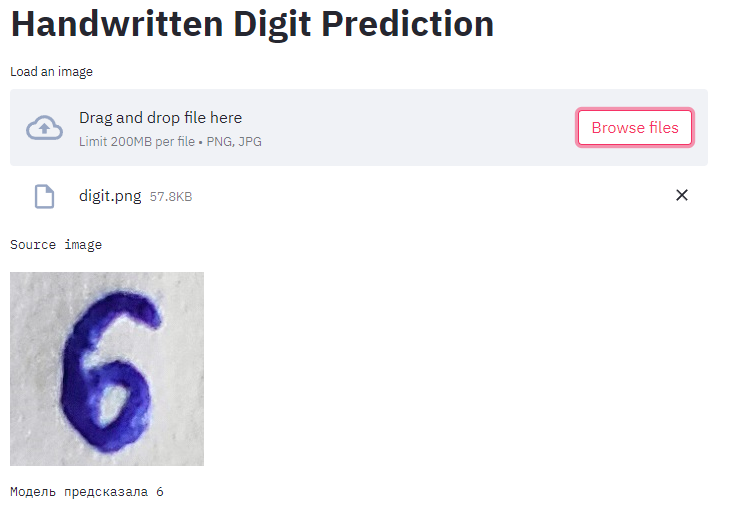